<a href="https://colab.research.google.com/github/saurabkunwar/computervision/blob/main/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base model

## Gettting data from source

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/MyDrive/AIProjects/rock_paper_scissors"

dataset.rar


In [ ]:
!cp "/content/gdrive/MyDrive/AIProjects/rock_paper_scissors/dataset.rar" dataset.rar

In [ ]:
!pip install patool

     |████████████████████████████████| 77 kB 4.4 MB/s 


In [ ]:
import patoolib

patoolib.extract_archive("dataset.rar")

patool: Extracting dataset.rar ...
patool: running /usr/bin/unrar x -- /content/dataset.rar
patool:     with cwd='./Unpack_7r_28h2w'
patool: ... dataset.rar extracted to `dataset'.


'dataset'

## Exploring the data

In [ ]:
import os

In [ ]:
for dirpath, dirnames, filenames in os.walk("dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

There are 2 directories and 0 files in dataset
There are 3 directories and 0 files in dataset/train
There are 0 directories and 570 files in dataset/train/paper
There are 0 directories and 570 files in dataset/train/scissors
There are 0 directories and 570 files in dataset/train/rock
There are 3 directories and 0 files in dataset/test
There are 0 directories and 142 files in dataset/test/paper
There are 0 directories and 142 files in dataset/test/scissors
There are 0 directories and 142 files in dataset/test/rock


In [ ]:
# Now exploring if the data formats are same or different

def explore_data_format(path):

  files = os.listdir(path)

  extensions = []

  for f in files:
    extension = f.split(".")[1]
    if extension not in extensions:
      extensions.append(extension)

  return extensions

In [ ]:
explore_data_format("dataset/test/paper")

# Every files are png

['png']

In [ ]:
import random
import matplotlib.pyplot as plt

class_names = ["paper", "rock", "scissors"]
data_types = ["train", "test"]

In [ ]:
def view_random_file():

  data_type = random.choice(data_types)
  class_type = random.choice(class_names)

  directory_path = "dataset/" + data_type + "/" + class_type

  random_file = random.choice(os.listdir(directory_path))

  path = directory_path+"/"+random_file

  img = plt.imread(path)
  plt.figure()
  plt.imshow(img)
  plt.axis(False)
  plt.title(f"Data type : {data_type} Class Name : {class_type} Image Shape : {img.shape}")

  return img


array([[[0.1882353 , 0.56078434, 0.23921569],
        [0.19607843, 0.5686275 , 0.24705882],
        [0.19607843, 0.5686275 , 0.24705882],
        ...,
        [0.34117648, 0.3372549 , 0.14117648],
        [0.32941177, 0.32156864, 0.12941177],
        [0.3137255 , 0.29411766, 0.11372549]],

       [[0.18431373, 0.5568628 , 0.22745098],
        [0.19215687, 0.5647059 , 0.23529412],
        [0.19215687, 0.5647059 , 0.23529412],
        ...,
        [0.14117648, 0.3764706 , 0.13725491],
        [0.14117648, 0.3764706 , 0.13725491],
        [0.14901961, 0.34117648, 0.15294118]],

       [[0.1882353 , 0.56078434, 0.23137255],
        [0.1882353 , 0.56078434, 0.23137255],
        [0.19215687, 0.5647059 , 0.23529412],
        ...,
        [0.12941177, 0.3647059 , 0.1254902 ],
        [0.12156863, 0.3529412 , 0.11372549],
        [0.14117648, 0.32941177, 0.14117648]],

       ...,

       [[0.19215687, 0.5686275 , 0.21960784],
        [0.19607843, 0.5764706 , 0.21568628],
        [0.2       , 0

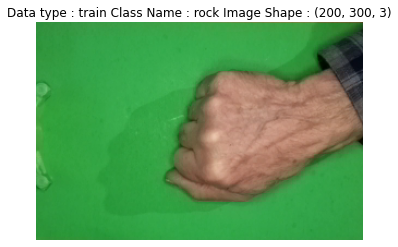

In [ ]:
view_random_file()

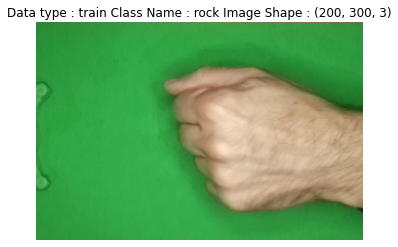

In [ ]:
random_image = view_random_file()

In [ ]:
random_image.shape

(200, 300, 3)

In [ ]:
def explore_image_shape(path):

  files = os.listdir(path)

  shapes = []

  for f in files:
    
    file_path = path + "/" + f

    img = plt.imread(file_path)

    shape=img.shape

    if shape not in shapes:
      shapes.append(shape)

  return shapes

In [ ]:
explore_image_shape("dataset/test/rock")

[(200, 300, 3)]

From data exploration it is concluded that everything is normalized and has a shape of (200, 300, 3)

## Preprocessing the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "dataset/train/"
test_dir = "dataset/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode="categorical")

Found 1710 images belonging to 3 classes.
Found 426 images belonging to 3 classes.


In [ ]:
type(train_data)

keras.preprocessing.image.DirectoryIterator

In [ ]:
images, labels = train_data.next()

In [ ]:
labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

## Building the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras import Sequential

In [ ]:
base_model = Sequential([
         Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
         Conv2D(10, 3, activation="relu"),
         MaxPool2D(2),
         Conv2D(10, 3, activation="relu"),
         Conv2D(10, 3, activation="relu"),
         MaxPool2D(2),
         Flatten(),
         Dense(3, activation="softmax")
])

base_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

In [ ]:
history_base_model = base_model.fit(train_data,
                                    epochs=10,
                                    steps_per_epoch=len(train_data),
                                    validation_data = test_data,
                                    validation_steps=len(test_data))

Epoch 1/10
54/54 [==============================] - 37s 155ms/step - loss: 1.2449 - accuracy: 0.4620 - val_loss: 0.8409 - val_accuracy: 0.6972
Epoch 2/10
54/54 [==============================] - 8s 141ms/step - loss: 0.6784 - accuracy: 0.7409 - val_loss: 0.4694 - val_accuracy: 0.8310
Epoch 3/10
54/54 [==============================] - 8s 140ms/step - loss: 0.4594 - accuracy: 0.8427 - val_loss: 0.4176 - val_accuracy: 0.8380
Epoch 4/10
54/54 [==============================] - 8s 140ms/step - loss: 0.2729 - accuracy: 0.9158 - val_loss: 0.2990 - val_accuracy: 0.8920
Epoch 5/10
54/54 [==============================] - 7s 138ms/step - loss: 0.2167 - accuracy: 0.9357 - val_loss: 0.2521 - val_accuracy: 0.9178
Epoch 6/10
54/54 [==============================] - 8s 139ms/step - loss: 0.1566 - accuracy: 0.9520 - val_loss: 0.2685 - val_accuracy: 0.9108
Epoch 7/10
54/54 [==============================] - 7s 138ms/step - loss: 0.0971 - accuracy: 0.9696 - val_loss: 0.2322 - val_accuracy: 0.9249
Epoch

## Evaluating the results

In [ ]:
base_model.evaluate(test_data)

14/14 [==============================] - 1s 103ms/step - loss: 0.3275 - accuracy: 0.9202


[0.32748523354530334, 0.920187771320343]

In [ ]:
def plot_history_curves(history):

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  epochs = range(len(loss))

  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.legend()
  plt.title("Accuracy")

  plt.figure()
  plt.plot(epochs, loss, label="loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.legend()
  plt.title("Losses")

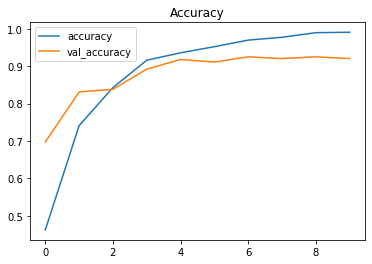

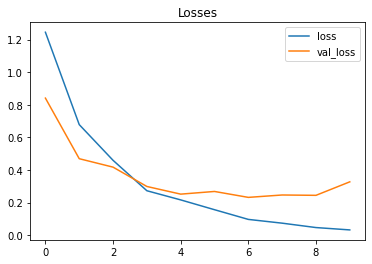

In [ ]:
plot_history_curves(history_base_model)

We can see little bit of overfitting we can solve so by method of augmentation

# Experimenting again with data augmentation and bigger model

## Augmentating the data

In [ ]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       zoom_range=0.2)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       batch_size=32,
                                                       class_mode="categorical",
                                                       target_size=(224, 224),
                                                       shuffle=True)

Found 1710 images belonging to 3 classes.


## Building bigger model

In [ ]:
model_1 = Sequential([
      Conv2D(64, 3, activation="relu", input_shape=(224, 224, 3)),
      Conv2D(64, 3, activation="relu"),
      MaxPool2D(2),
      Conv2D(64, 3, activation="relu"),
      Conv2D(64, 3, activation="relu"),
      MaxPool2D(2),
      Flatten(),
      Dense(100, activation="relu"),
      Dense(40, activation="relu"),
      Dense(3, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"])

In [ ]:
history_1 = model_1.fit(train_data_aug,
            epochs=8,
            steps_per_epoch=len(train_data_aug),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/8
54/54 [==============================] - 32s 570ms/step - loss: 1.0946 - accuracy: 0.3959 - val_loss: 0.8827 - val_accuracy: 0.5587
Epoch 2/8
54/54 [==============================] - 31s 569ms/step - loss: 0.7308 - accuracy: 0.6918 - val_loss: 0.3775 - val_accuracy: 0.8803
Epoch 3/8
54/54 [==============================] - 30s 560ms/step - loss: 0.4796 - accuracy: 0.8088 - val_loss: 0.1328 - val_accuracy: 0.9648
Epoch 4/8
54/54 [==============================] - 30s 558ms/step - loss: 0.3198 - accuracy: 0.8825 - val_loss: 0.0902 - val_accuracy: 0.9718
Epoch 5/8
54/54 [==============================] - 30s 561ms/step - loss: 0.2440 - accuracy: 0.9181 - val_loss: 0.1020 - val_accuracy: 0.9765
Epoch 6/8
54/54 [==============================] - 31s 562ms/step - loss: 0.2226 - accuracy: 0.9228 - val_loss: 0.0845 - val_accuracy: 0.9765
Epoch 7/8
54/54 [==============================] - 31s 563ms/step - loss: 0.2102 - accuracy: 0.9269 - val_loss: 0.0676 - val_accuracy: 0.9812
Epoch 

In [ ]:
model_1.evaluate(test_data)

14/14 [==============================] - 2s 117ms/step - loss: 0.0842 - accuracy: 0.9695


[0.08418840914964676, 0.9694835543632507]

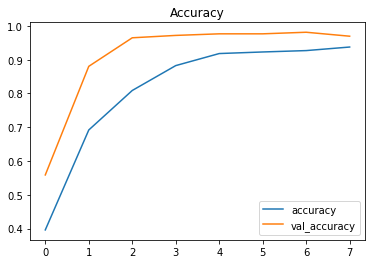

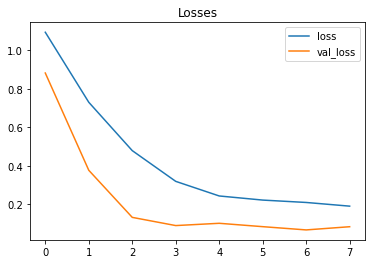

In [ ]:
plot_history_curves(history_1)

Im satisfied with current result lets evaluate with general data

In [ ]:
def validate_random_train_data(model, img_path=None):


  if img_path is None:
    random_class = random.choice(class_names)
    target_dir = "dataset/test/"+random_class
    random_img = random.choice(os.listdir(target_dir))

    img = plt.imread(target_dir+"/"+random_img)
  else:
    img = plt.imread(img_path)

  plt.figure()
  plt.imshow(img)

  # Preprocessing the data
  img = tf.image.resize(img, [224, 224])
  img = tf.expand_dims(img, axis=0)

  prediction = model.predict(img)

  predicted_class = class_names[prediction.argmax()]

  plt.title(predicted_class)
  plt.axis(False)

  return prediction

array([[3.3434702e-03, 9.9665630e-01, 2.1682499e-07]], dtype=float32)

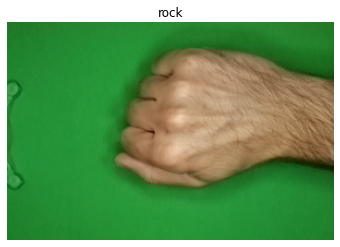

In [ ]:
validate_random_train_data(model_1)

In [ ]:
!wget data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBw8SEhUSEA8VFRUVFRUVFRUVFRUVFRUVFxUXFxcVFRUYHSggGBolHRUXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFxAPGDIlIB0tLS0tMCstKys1Li0rKystLSstKysrLSstLS0tLS0rLS0tKy0rKy0rLS0tLS0tNy0tK//AABEIALcBEwMBIgACEQEDEQH/xAAbAAEBAAMBAQEAAAAAAAAAAAAAAQIDBAUGB//EADUQAAIBAgQEBAQGAQUBAAAAAAABAgMRBAUhMRJBUXEiYYGhkbHR8AYTMkLB4WJSgpKy8RX/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQMEAgX/xAAhEQEAAgICAgMBAQAAAAAAAAAAAQIDESExEkEEE1FhMv/aAAwDAQACEQMRAD8A/SIo2JBIzSCCRmkEipFBIyFikAAoAoAAoKBCgoELYACFAAAAACFAAgApSFKKCAACgCEMiAYNGLRsMWBraBkAOdIzSIkZNAUtgigEUCwCxUCkEKCoAAAKAUACAAAAIwAwAIUAAAKUiKgBQCgCgARFAGJGZEYGAM0gBzJGVgipACgoUAKAKQpEAABQQAUEFwKQlwBQQAUgAUAKECkKAKEUAUAoAFAEBQIRlAGIKQDSUIoAAoUAKAQBAKS4uQiLclyNkuBlcXMLi4GdwjXKaSu2klzei9WeZiPxBQi7RvN/47f8nv6XJMxHb1Ws26h65UeV/wDSqShxU4Ja7Nt3tyVrakwOZzk7VFFX2sn9Tz9lWn03esAU9sgpCgCgAUAoQKQoAAFAAAGQoAhCgDSUAAAAoCC4FuQlxcAS5LkbIK2RswcjVOoUbnI4M1zJUafFa7vaK6vz8hWxSR89nOJ/MnCK2jd+r/8APc8XtqHvHXytENU6lSsuOrN2v/tXRJbIs/y4Rbe+n/ZJnrZdRi42lFNNWd7a9+p83+OMuqRoVHQclLhbil4le22upxzEzy+lXxjh7+W5hF2invt5HVi04pTjHjd91okfk/4Uz6vVgnKnK8dOJaXt5cmfpWR5jVmtY2jbVyt8j3E+pW9a68ol9DlmO/MVmrNadTusfN5diKcaloz4rq2my9XufSpp6o2x23w4M1Iidx7ACo1YBSFAFAQRQAABQFQFIUAAAAARpFyXJcCslyXFwKS5GyXCrcjZLmLkBWzCUjGUjTUqAWpUOHE4qxMRWPGx1c8zKxDDHY99TiozbldnJXqam+g9TG8urDV9VlrN2cUk4PTkaMqZ6GPa4GePTo9vxb8O5lGhVnScbv8AMnaK31k5L2Z9pQrTn+rSPKC29XzPj8fhlTxk6jVnp8Hp9D6XL8wjOShDdWu+n9mO+W1qzrb6Ojgm3GSe1nqfXYV3XofJYeOnicn3f8KyPoMmqrhtfna3yN8c8uTNG6T/AB6YAOlwqEABQCoIFIUAAAAAKoQoAgFwBzXJclyXCLclyXJcDK5i2RsxbCq2YykYuRrlIBORy1qhnVmcNeoRWjE1DxcfWS3ZszHMUtI6y9l3PFq8Td5O7+9jC+SI4b48U25lJVOJ6Hbh76e5ro4fS9jpprn52v8AJmG5l2VrEdPpMrm7I76tS+i9WePg6vLbqe3SUeG3lb4nqHqdQ+Qz3JIVVeS1vdPmrvkz53LstrYaT8MnFt2lFXe/7ub7n6BiqDlHz4l8zuhSpxsnFNWPPg9/Zrt8ngc+i9FRqaaXaVu7Td18D7PI5xlFNQt59Tz8Rl1GVRTpqzvaaXPkpd18ux72EwsaatFdzTHWduf5F6RXUe3QADqfOUAAUABFAKAABVAAAAAEAuAOC4ua+IXCMri5hcnEFZNmLkYORrnUAzlI56lU5MdmVOn+qWvJbt+h4GLzarU0guFdf3f0eL5K17aUxWt09fH5lCG716Lc8HFY2rU28K6Lf1ZqpUOurOqMDlvmmenXTBWvbjVCy03NlDC7uXlY6eB2dt2z0KOGV9NupnDaZcP5draenyMKi4U+j9menOir7bfM0VKDe60PSbcuCxV32tfue5DFaL3+B4kcC1LTe+nn9T3sBlU2vE7Le27/AKPVYmei2StY5YzxVtv3e1jvw+FnVs5eGPu+33zOzC5bShqopvq9fnsdptXF+uS/yN/5Y0qUYq0VZfe5sIU2cwUhQKAAigFAAAopSAKAACFBAAAA8aMjJs8Oef0Fs2+yf8mqp+I4/tg33aXyueJvX9e4x2n099zNVWvGKvJpLq3Y+Yr5zXl+m0eyu/c5JRlLWbbfm7mds8R01r8e09vfxOd0o7Nyf+K/nY8nE5vWn+lcC+L+JoVIyjSZlbNaW9cFK9uSFJt3d2+bZv4LcjojRRuhR8jJtE6aFC2xtpUeZ0Rpm1UxpNtVOjqdlOJjHQz40ioWSZaeGlUfhVl/qe3p1OvCYFy8U1Zclzffoj1qdNLZG9MW+Zc+TNriHJgsujDbV9Xv/R3wjb78ixRTeIiOnLMzPagAqKVEKAKQFFKRAIqKQoVQCgAAAAAAhSAAQAfkdOB0QgSnTZ10aR899RjTgdEaTNsIG+NMaedy540Dd+SbVAzsXRtpVKxmomZbIi7YJGWhhKZswmFnVemkeb/hdWWImeIS0xEblhFyk+GCu3yPYwOWqNpT8UvZduvc6sJhIU1aK7vm+7OlI6aYojmXJkzTbiOkijNIA1YKUhQAAKKAAKAAKGQMDJFIigUAAUAAAAAIwQCMC4CPzOkjrpROegzqUjgfSboI3KRzqZsUxsbjFyMHM1zqDZpv4zVOsYUozm7QV3979D38vyqMPFLxS9l2+p6pSbPN8kUcWAyuU/FUVo9Ob+iPep00lZKyXJGSKjqrSK9OO95tPIioFPbwFIUAUhQAAAoIigCkAFQAApSFApSFAFIAKQAAYspiwiMpi2APzKnUOmMgD576cNqqFdUAK1yqnqYHJ5zs5vhj0Wrf0ANsVInthmvNY4fQ4XDQgrRjb75s3pAHU4woAFCAApQACAAAoAAAAUIACgACopABkAAKAABAAI2YNgFRiAAP/9k=

--2021-09-12 05:31:00--  ftp://data/image/jpeg
           => ‘jpeg’
Resolving data (data)... failed: No address associated with hostname.
wget: unable to resolve host address ‘data’
/bin/bash: base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBw8SEhUSEA8VFRUVFRUVFRUVFRUVFRUVFxUXFxcVFRUYHSggGBolHRUXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFxAPGDIlIB0tLS0tMCstKys1Li0rKystLSstKysrLSstLS0tLS0rLS0tKy0rKy0rLS0tLS0tNy0tK//AABEIALcBEwMBIgACEQEDEQH/xAAbAAEBAAMBAQEAAAAAAAAAAAAAAQIDBAUGB//EADUQAAIBAgQEBAQGAQUBAAAAAAABAgMRBAUhMRJBUXEiYYGhkbHR8AYTMkLB4WJSgpKy8RX/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQMEAgX/xAAhEQEAAgICAgMBAQAAAAAAAAAAAQIDESExEkEEE1FhMv/aAAwDAQACEQMRAD8A/SIo2JBIzSCCRmkEipFBIyFikAAoAoAAoKBCgoELYACFAAAAACFAAgApSFKKCAACgCEMiAYNGLRsMWBraBkAOdIzSIkZNAUtgigEUCwCxUCkEKCoAAAKAUACAAAAIwAwAIUAAAKUiKgBQCgCgARFAGJGZEYGAM0gBzJGVgipACgoUAKAKQpEAABQQAUEFwKQlwBQQAUgAUAKECkKAKEUAUAoAFAEBQIRlAGIKQDSUIoAAoUAKAQBAKS4uQiLclyNkuBlcXMLi4GdwjXKaSu2klzei9WeZiPxBQi7RvN/47f8nv6XJMxHb1Ws26h65UeV/wDSqShxU4Ja7Nt3tyVrakwOZzk7VFFX2sn9

In [ ]:
9.9e-01

0.99